In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [9]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [10]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Summary
We have a dataframe consisting of 9827 rows and 9 columns
Our dataset looks a bit tidy with no Nans nor duplicated values
Release_Date column needs to be created into date time and to extract only the year value
Overview, Original_language and Poster_URL wouldnt be so useful during analysis, so we will drop them 
Vote_Average better be categorised for proper analysis
Genre column has a comma seprated values and white spaces that nedds to be handled and casted into category.Exploraation Summary

In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [15]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int64')

In [16]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
## Dropping the columns
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [18]:
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [19]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [20]:
df['Vote_Average'].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

# Categorizing the columns
We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using catigorize_col() function provided beolow

In [26]:
def cat_col(df, col, labels):
    edges = [df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [27]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

In [28]:
cat_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [32]:
round(df['Vote_Average'].value_counts(normalize=True)*100 ,2)

not_popular    25.36
popular        25.19
average        24.80
below_avg      24.65
Name: Vote_Average, dtype: float64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we'd split genres into a list and then explode our dataframe to hv only one genre per row for each movie 

In [36]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [37]:
## casting column into category

In [40]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [41]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Data visualization 

In [42]:
sns.set_style('whitegrid')

What is the most frequent genre of movies relaesed on Netfilx?

In [44]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

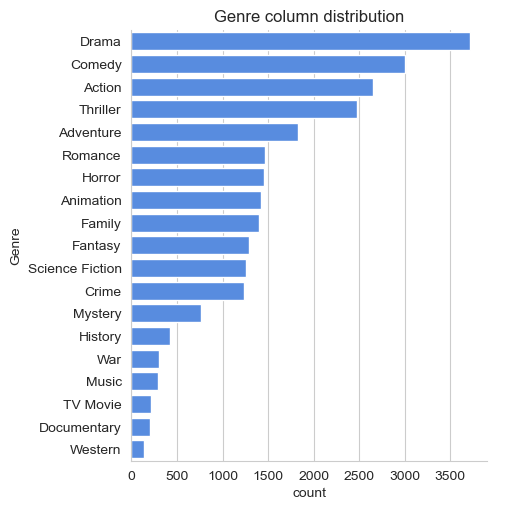

In [45]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order  = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()


Which has highest votes in vote avg column

In [47]:
df['Vote_Average'].value_counts()

average        6613
popular        6520
below_avg      6348
not_popular    6071
Name: Vote_Average, dtype: int64

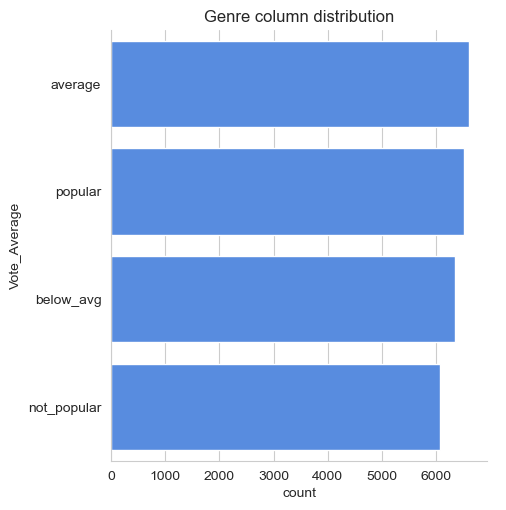

In [48]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', 
            order  = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Vote distribution')
plt.show()


In [49]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama


In [51]:
df.groupby('Genre')['Popularity'].max()

Genre
Action             5083.954
Adventure          5083.954
Animation          2402.201
Comedy             2402.201
Crime              3827.658
Documentary         246.652
Drama              1455.144
Family             2402.201
Fantasy            2402.201
History             601.958
Horror             1675.161
Music              1112.900
Mystery            3827.658
Romance             761.793
Science Fiction    5083.954
TV Movie            266.754
Thriller           3827.658
War                1895.511
Western             614.110
Name: Popularity, dtype: float64

Which movie got the highest popularity ? whats its genre?

In [53]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Which movie got the lowest popularity ? whats its genre?

In [55]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Which year has the most filmed movies?

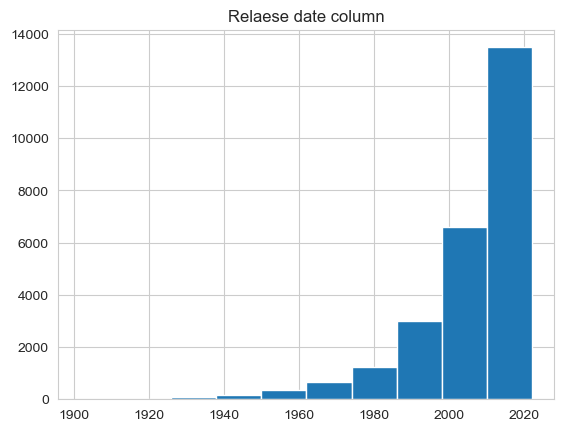

In [57]:
df['Release_Date'].hist()
plt.title('Relaese date column')
plt.show()

## Conclusion

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: What genres has highest votes?

We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The United States, Thread has the lowest rate in our dataset and it has genres of music, drama, war, sci-fi and history.

Q4: Which year has the most filmed movies?

Year 2020 has the highest filming rate in our dataset.